In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv('input/Datamart-Export_DY_WK100-500 Pound Barrel Cheddar Cheese Prices, Sales, and Moisture Content_20170829_122601.csv')

In [3]:
data.shape

(1410, 7)

In [4]:
data.head(10)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content
0,08/19/2017,08/23/2017,07/22,1.5238,1.4489,"9,233,624",34.79
1,08/19/2017,08/23/2017,07/29,1.5636,1.4863,"10,948,266",34.77
2,08/19/2017,08/23/2017,08/05,1.5891,1.5113,"11,520,370",34.81
3,08/19/2017,08/23/2017,08/12,1.6360,1.5526,"10,741,788",34.67
4,08/19/2017,08/23/2017,08/19,1.6543,1.5738,"11,131,479",34.83
5,08/12/2017,08/16/2017,08/12,1.6360,1.5526,"10,752,293",34.67
6,08/12/2017,08/16/2017,08/05,1.5891,1.5113,"11,520,371",34.81
7,08/12/2017,08/16/2017,07/29,1.5636,1.4863,"10,948,267",34.77
8,08/12/2017,08/16/2017,07/22,1.5238,1.4489,"9,233,624",34.80
9,08/12/2017,08/16/2017,07/15,1.4880,1.4164,"13,441,457",34.87


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.dtypes

Week Ending Date                            object
Report Date                                 object
Date                                        object
Weighted Price                             float64
Weighted Price adjusted to 38% moisture    float64
Sales                                       object
Moisture Content                           float64
dtype: object

In [7]:
data.isnull().any()

Week Ending Date                           False
Report Date                                False
Date                                       False
Weighted Price                             False
Weighted Price adjusted to 38% moisture    False
Sales                                      False
Moisture Content                           False
dtype: bool

In [8]:
data.describe()

,Weighted Price,Weighted Price adjusted to 38% moisture,Moisture Content
count,1410.000000,1410.000000,1410.000000
mean,1.807688,1.742051,34.576922
std,0.314208,0.241344,3.590251
min,0.000000,1.354400,0.000000
25%,1.621600,1.554700,34.840000
50%,1.767600,1.687650,34.945000
75%,1.919800,1.831800,35.040000
max,2.598400,2.476400,35.350000


In [9]:
data['mo_day']=data['Date'].astype(str)+'-1999'
data.head()

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day
0,08/19/2017,08/23/2017,07/22,1.5238,1.4489,"9,233,624",34.79,07/22-1999
1,08/19/2017,08/23/2017,07/29,1.5636,1.4863,"10,948,266",34.77,07/29-1999
2,08/19/2017,08/23/2017,08/05,1.5891,1.5113,"11,520,370",34.81,08/05-1999
3,08/19/2017,08/23/2017,08/12,1.6360,1.5526,"10,741,788",34.67,08/12-1999
4,08/19/2017,08/23/2017,08/19,1.6543,1.5738,"11,131,479",34.83,08/19-1999


In [10]:
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

data['year'] = data['Week Ending Date'].dt.year
data.head(5)
data.tail(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year
1405,2012-03-31,04/04/2012,03/31,1.6727,1.5909,"9,446,921",34.81,03/31-1999,2012
1406,2012-03-31,04/04/2012,03/24,1.6333,1.5549,"9,924,835",34.87,03/24-1999,2012
1407,2012-03-31,04/04/2012,03/17,1.5857,1.5056,"11,921,822",34.70,03/17-1999,2012
1408,2012-03-31,04/04/2012,03/10,1.5865,1.5146,"11,239,556",35.06,03/10-1999,2012
1409,2012-03-31,04/04/2012,03/03,1.5837,1.5064,"10,751,088",34.82,03/03-1999,2012


In [11]:
data['mo_day'] = pd.to_datetime(data['mo_day'])
data['month'],data['day'] = data['mo_day'].dt.month, data['mo_day'].dt.day 
data.head(10)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day
0,2017-08-19,08/23/2017,07/22,1.5238,1.4489,"9,233,624",34.79,1999-07-22,2017,7,22
1,2017-08-19,08/23/2017,07/29,1.5636,1.4863,"10,948,266",34.77,1999-07-29,2017,7,29
2,2017-08-19,08/23/2017,08/05,1.5891,1.5113,"11,520,370",34.81,1999-08-05,2017,8,5
3,2017-08-19,08/23/2017,08/12,1.6360,1.5526,"10,741,788",34.67,1999-08-12,2017,8,12
4,2017-08-19,08/23/2017,08/19,1.6543,1.5738,"11,131,479",34.83,1999-08-19,2017,8,19
5,2017-08-12,08/16/2017,08/12,1.6360,1.5526,"10,752,293",34.67,1999-08-12,2017,8,12
6,2017-08-12,08/16/2017,08/05,1.5891,1.5113,"11,520,371",34.81,1999-08-05,2017,8,5
7,2017-08-12,08/16/2017,07/29,1.5636,1.4863,"10,948,267",34.77,1999-07-29,2017,7,29
8,2017-08-12,08/16/2017,07/22,1.5238,1.4489,"9,233,624",34.80,1999-07-22,2017,7,22
9,2017-08-12,08/16/2017,07/15,1.4880,1.4164,"13,441,457",34.87,1999-07-15,2017,7,15


In [12]:
data.dtypes

Week Ending Date                           datetime64[ns]
Report Date                                        object
Date                                               object
Weighted Price                                    float64
Weighted Price adjusted to 38% moisture           float64
Sales                                              object
Moisture Content                                  float64
mo_day                                     datetime64[ns]
year                                                int64
month                                               int64
day                                                 int64
dtype: object

In [13]:
data['Date_yr'] = data['year'].map(str)+'-' + data['month'].map(str) +'-'+ data['day'].map(str)     
data.head(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr
0,2017-08-19,08/23/2017,07/22,1.5238,1.4489,"9,233,624",34.79,1999-07-22,2017,7,22,2017-7-22
1,2017-08-19,08/23/2017,07/29,1.5636,1.4863,"10,948,266",34.77,1999-07-29,2017,7,29,2017-7-29
2,2017-08-19,08/23/2017,08/05,1.5891,1.5113,"11,520,370",34.81,1999-08-05,2017,8,5,2017-8-5
3,2017-08-19,08/23/2017,08/12,1.6360,1.5526,"10,741,788",34.67,1999-08-12,2017,8,12,2017-8-12
4,2017-08-19,08/23/2017,08/19,1.6543,1.5738,"11,131,479",34.83,1999-08-19,2017,8,19,2017-8-19


In [14]:
data['Date_yr'] = pd.to_datetime(data['Date_yr'])
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])
data.head(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr
0,2017-08-19,08/23/2017,07/22,1.5238,1.4489,"9,233,624",34.79,1999-07-22,2017,7,22,2017-07-22
1,2017-08-19,08/23/2017,07/29,1.5636,1.4863,"10,948,266",34.77,1999-07-29,2017,7,29,2017-07-29
2,2017-08-19,08/23/2017,08/05,1.5891,1.5113,"11,520,370",34.81,1999-08-05,2017,8,5,2017-08-05
3,2017-08-19,08/23/2017,08/12,1.6360,1.5526,"10,741,788",34.67,1999-08-12,2017,8,12,2017-08-12
4,2017-08-19,08/23/2017,08/19,1.6543,1.5738,"11,131,479",34.83,1999-08-19,2017,8,19,2017-08-19


In [15]:
data.dtypes

Week Ending Date                           datetime64[ns]
Report Date                                        object
Date                                               object
Weighted Price                                    float64
Weighted Price adjusted to 38% moisture           float64
Sales                                              object
Moisture Content                                  float64
mo_day                                     datetime64[ns]
year                                                int64
month                                               int64
day                                                 int64
Date_yr                                    datetime64[ns]
dtype: object

In [16]:
data['Sales'] = data['Sales'].str.replace(',', '')
data['Sales'] = pd.to_numeric(data['Sales'])          
data.dtypes

Week Ending Date                           datetime64[ns]
Report Date                                        object
Date                                               object
Weighted Price                                    float64
Weighted Price adjusted to 38% moisture           float64
Sales                                               int64
Moisture Content                                  float64
mo_day                                     datetime64[ns]
year                                                int64
month                                               int64
day                                                 int64
Date_yr                                    datetime64[ns]
dtype: object

In [17]:
data['age']=(data['Week Ending Date']-data['Date_yr']).dt.days
data.head(10)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr,age
0,2017-08-19,08/23/2017,07/22,1.5238,1.4489,9233624,34.79,1999-07-22,2017,7,22,2017-07-22,28
1,2017-08-19,08/23/2017,07/29,1.5636,1.4863,10948266,34.77,1999-07-29,2017,7,29,2017-07-29,21
2,2017-08-19,08/23/2017,08/05,1.5891,1.5113,11520370,34.81,1999-08-05,2017,8,5,2017-08-05,14
3,2017-08-19,08/23/2017,08/12,1.6360,1.5526,10741788,34.67,1999-08-12,2017,8,12,2017-08-12,7
4,2017-08-19,08/23/2017,08/19,1.6543,1.5738,11131479,34.83,1999-08-19,2017,8,19,2017-08-19,0
5,2017-08-12,08/16/2017,08/12,1.6360,1.5526,10752293,34.67,1999-08-12,2017,8,12,2017-08-12,0
6,2017-08-12,08/16/2017,08/05,1.5891,1.5113,11520371,34.81,1999-08-05,2017,8,5,2017-08-05,7
7,2017-08-12,08/16/2017,07/29,1.5636,1.4863,10948267,34.77,1999-07-29,2017,7,29,2017-07-29,14
8,2017-08-12,08/16/2017,07/22,1.5238,1.4489,9233624,34.80,1999-07-22,2017,7,22,2017-07-22,21
9,2017-08-12,08/16/2017,07/15,1.4880,1.4164,13441457,34.87,1999-07-15,2017,7,15,2017-07-15,28


In [18]:
data.dtypes

Week Ending Date                           datetime64[ns]
Report Date                                        object
Date                                               object
Weighted Price                                    float64
Weighted Price adjusted to 38% moisture           float64
Sales                                               int64
Moisture Content                                  float64
mo_day                                     datetime64[ns]
year                                                int64
month                                               int64
day                                                 int64
Date_yr                                    datetime64[ns]
age                                                 int64
dtype: object

In [19]:
data.iloc[140:170,]

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr,age
140,2017-02-04,02/08/2017,01/07,1.7453,1.6589,9571316,34.77,1999-01-07,2017,1,7,2017-01-07,28
141,2017-02-04,02/08/2017,01/14,1.7193,1.6393,13702669,34.97,1999-01-14,2017,1,14,2017-01-14,21
142,2017-02-04,02/08/2017,01/21,1.7325,1.6524,11723737,34.99,1999-01-21,2017,1,21,2017-01-21,14
143,2017-02-04,02/08/2017,01/28,1.7316,1.6502,11741032,34.94,1999-01-28,2017,1,28,2017-01-28,7
144,2017-02-04,02/08/2017,02/04,1.6842,1.6062,12310466,34.99,1999-02-04,2017,2,4,2017-02-04,0
145,2017-01-28,02/01/2017,01/28,1.7314,1.6500,11660026,34.94,1999-01-28,2017,1,28,2017-01-28,0
146,2017-01-28,02/01/2017,01/21,1.7325,1.6524,11723737,34.99,1999-01-21,2017,1,21,2017-01-21,7
147,2017-01-28,02/01/2017,01/14,1.7193,1.6393,13702669,34.97,1999-01-14,2017,1,14,2017-01-14,14
148,2017-01-28,02/01/2017,01/07,1.7453,1.6589,9571316,34.77,1999-01-07,2017,1,7,2017-01-07,21
149,2017-01-28,02/01/2017,12/31,1.7644,1.6813,9501625,34.94,1999-12-31,2017,12,31,2017-12-31,-337


In [20]:
data['age'][data['age'] < 0] = 365+data['age']
data.iloc[140:170,]

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,month,day,Date_yr,age
140,2017-02-04,02/08/2017,01/07,1.7453,1.6589,9571316,34.77,1999-01-07,2017,1,7,2017-01-07,28
141,2017-02-04,02/08/2017,01/14,1.7193,1.6393,13702669,34.97,1999-01-14,2017,1,14,2017-01-14,21
142,2017-02-04,02/08/2017,01/21,1.7325,1.6524,11723737,34.99,1999-01-21,2017,1,21,2017-01-21,14
143,2017-02-04,02/08/2017,01/28,1.7316,1.6502,11741032,34.94,1999-01-28,2017,1,28,2017-01-28,7
144,2017-02-04,02/08/2017,02/04,1.6842,1.6062,12310466,34.99,1999-02-04,2017,2,4,2017-02-04,0
145,2017-01-28,02/01/2017,01/28,1.7314,1.6500,11660026,34.94,1999-01-28,2017,1,28,2017-01-28,0
146,2017-01-28,02/01/2017,01/21,1.7325,1.6524,11723737,34.99,1999-01-21,2017,1,21,2017-01-21,7
147,2017-01-28,02/01/2017,01/14,1.7193,1.6393,13702669,34.97,1999-01-14,2017,1,14,2017-01-14,14
148,2017-01-28,02/01/2017,01/07,1.7453,1.6589,9571316,34.77,1999-01-07,2017,1,7,2017-01-07,21
149,2017-01-28,02/01/2017,12/31,1.7644,1.6813,9501625,34.94,1999-12-31,2017,12,31,2017-12-31,28


In [21]:
df1=data
del df1['month']
del df1['day']
df1.head(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
0,2017-08-19,08/23/2017,07/22,1.5238,1.4489,9233624,34.79,1999-07-22,2017,2017-07-22,28
1,2017-08-19,08/23/2017,07/29,1.5636,1.4863,10948266,34.77,1999-07-29,2017,2017-07-29,21
2,2017-08-19,08/23/2017,08/05,1.5891,1.5113,11520370,34.81,1999-08-05,2017,2017-08-05,14
3,2017-08-19,08/23/2017,08/12,1.6360,1.5526,10741788,34.67,1999-08-12,2017,2017-08-12,7
4,2017-08-19,08/23/2017,08/19,1.6543,1.5738,11131479,34.83,1999-08-19,2017,2017-08-19,0


In [22]:
years = df1.set_index("year")
years.head()
years.tail()

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,Date_yr,age
year,,,,,,,,,,
2012,2012-03-31,04/04/2012,03/31,1.6727,1.5909,9446921,34.81,1999-03-31,2012-03-31,0
2012,2012-03-31,04/04/2012,03/24,1.6333,1.5549,9924835,34.87,1999-03-24,2012-03-24,7
2012,2012-03-31,04/04/2012,03/17,1.5857,1.5056,11921822,34.70,1999-03-17,2012-03-17,14
2012,2012-03-31,04/04/2012,03/10,1.5865,1.5146,11239556,35.06,1999-03-10,2012-03-10,21
2012,2012-03-31,04/04/2012,03/03,1.5837,1.5064,10751088,34.82,1999-03-03,2012-03-03,28


In [23]:
#2017 data
df2017=df1.iloc[0:165,]  #line 165 is 2016 so we need 1 more than line 164 ie 165
#df2017.head()
df2017.tail()

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
160,2017-01-07,01/11/2017,12/10,1.8146,1.7338,12170956,35.11,1999-12-10,2017,2017-12-10,28
161,2017-01-07,01/11/2017,12/17,1.7761,1.6928,12412307,34.95,1999-12-17,2017,2017-12-17,21
162,2017-01-07,01/11/2017,12/24,1.7882,1.7040,10798260,34.94,1999-12-24,2017,2017-12-24,14
163,2017-01-07,01/11/2017,12/31,1.7644,1.6813,9501625,34.94,1999-12-31,2017,2017-12-31,7
164,2017-01-07,01/11/2017,01/07,1.7446,1.6576,9406780,34.75,1999-01-07,2017,2017-01-07,0


In [24]:
df2016=df1.iloc[166:430,]  #line 430 is 2015 so we need 1 more than line 429 ie 430
#df2016.head()
df2016.tail(7)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
423,2016-01-09,01/13/2016,01/02,1.5586,1.4857,8839183,34.96,1999-01-02,2016,2016-01-02,7
424,2016-01-09,01/13/2016,01/09,1.5873,1.5160,11141233,35.08,1999-01-09,2016,2016-01-09,0
425,2016-01-02,01/06/2016,01/02,1.5569,1.4845,8636161,34.97,1999-01-02,2016,2016-01-02,0
426,2016-01-02,01/06/2016,12/26,1.5754,1.4981,8669656,34.80,1999-12-26,2016,2016-12-26,6
427,2016-01-02,01/06/2016,12/19,1.6124,1.5362,10400022,34.93,1999-12-19,2016,2016-12-19,13
428,2016-01-02,01/06/2016,12/12,1.6235,1.5525,10316439,35.16,1999-12-12,2016,2016-12-12,20
429,2016-01-02,01/06/2016,12/05,1.6349,1.5585,9709622,34.96,1999-12-05,2016,2016-12-05,27


In [25]:
df2015=df1.iloc[430:690,]  #line 690 is 2014 so we need 1 more than line 690 ie 691
#df2015.head()
df2015.tail(7)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
683,2015-01-10,01/14/2015,01/03,1.6474,1.5672,9122463,34.83,1999-01-03,2015,2015-01-03,7
684,2015-01-10,01/14/2015,01/10,1.6091,1.5322,10718107,34.89,1999-01-10,2015,2015-01-10,0
685,2015-01-03,01/07/2015,01/03,1.6474,1.5672,9122463,34.83,1999-01-03,2015,2015-01-03,0
686,2015-01-03,01/07/2015,12/27,1.6648,1.5894,8306632,35.06,1999-12-27,2015,2015-12-27,7
687,2015-01-03,01/07/2015,12/20,1.6680,1.5900,9999121,34.96,1999-12-20,2015,2015-12-20,14
688,2015-01-03,01/07/2015,12/13,1.7866,1.7038,10442002,34.99,1999-12-13,2015,2015-12-13,21
689,2015-01-03,01/07/2015,12/06,1.9197,1.8297,9961261,34.95,1999-12-06,2015,2015-12-06,28


In [32]:
df2014=df1.iloc[690:950,]  #line 950 is 2013
#df2014.head()
df2014.tail(7)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
943,2014-01-11,01/15/2014,01/04,2.0602,1.9665,10442145,35.04,1999-01-04,2014,2014-01-04,7
944,2014-01-11,01/15/2014,01/11,2.0463,1.9490,10432246,34.91,1999-01-11,2014,2014-01-11,0
945,2014-01-04,01/08/2014,01/04,2.0600,1.9666,10364785,35.06,1999-01-04,2014,2014-01-04,0
946,2014-01-04,01/08/2014,12/28,1.9897,1.8990,9930157,35.04,1999-12-28,2014,2014-12-28,7
947,2014-01-04,01/08/2014,12/21,1.9219,1.8358,10207370,35.09,1999-12-21,2014,2014-12-21,14
948,2014-01-04,01/08/2014,12/14,1.9459,1.8521,11302901,34.86,1999-12-14,2014,2014-12-14,21
949,2014-01-04,01/08/2014,12/07,1.8959,1.8105,11839380,35.07,1999-12-07,2014,2014-12-07,28


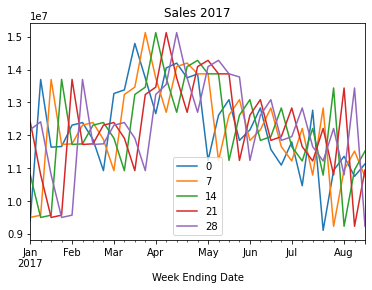

In [39]:
fig, ax = plt.subplots()
for name, group in df2017.groupby('age'):
    group.plot('Week Ending Date', y='Sales', ax=ax, label=name)
    ax.set_title('Sales 2017')
plt.show()

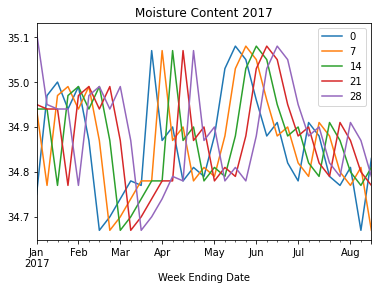

In [40]:
fig, ax = plt.subplots()
for name, group in df2017.groupby('age'):
    group.plot('Week Ending Date', y='Moisture Content', ax=ax, label=name)
    ax.set_title('Moisture Content 2017')
plt.show()

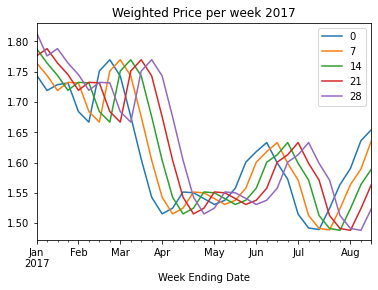

In [41]:
fig, ax = plt.subplots()
for name, group in df2017.groupby('age'):
    group.plot('Week Ending Date', y='Weighted Price', ax=ax, label=name)
    ax.set_title('Weighted Price per week 2017')
plt.show()

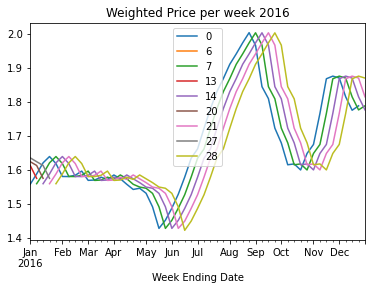

In [42]:
fig, ax = plt.subplots()
for name, group in df2016.groupby('age'):
    group.plot('Week Ending Date', y='Weighted Price', ax=ax, label=name)
    ax.set_title('Weighted Price per week 2016')
plt.show()

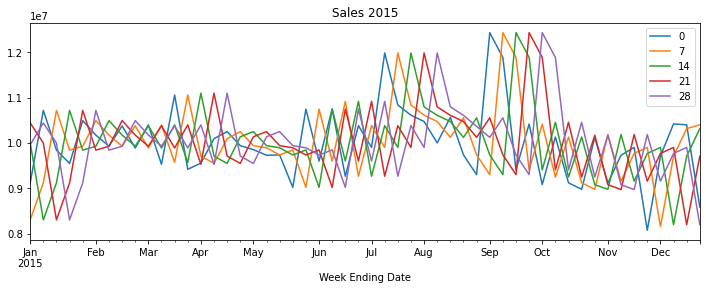

In [43]:
fig, ax = plt.subplots()
for name, group in df2015.groupby('age'):
    group.plot('Week Ending Date', y='Sales', ax=ax, label=name, figsize=(12,4))
    ax.set_title('Sales 2015')
plt.show()

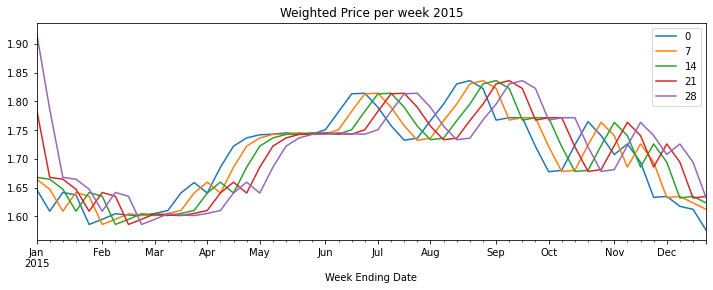

In [44]:
fig, ax = plt.subplots()
for name, group in df2015.groupby('age'):
    group.plot('Week Ending Date', y='Weighted Price', ax=ax, label=name, figsize=(12,4))
    ax.set_title('Weighted Price per week 2015')
plt.show()

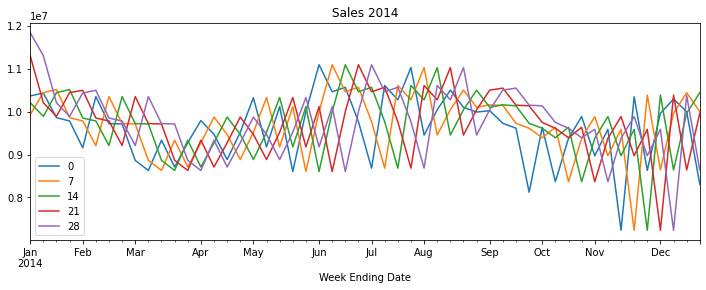

In [45]:
fig, ax = plt.subplots()
for name, group in df2014.groupby('age'):
    group.plot('Week Ending Date', y='Sales', ax=ax, label=name, figsize=(12,4))
    ax.set_title('Sales 2014')
plt.show()

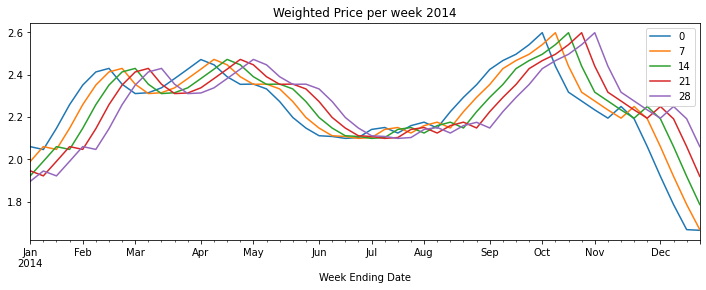

In [46]:
fig, ax = plt.subplots()
for name, group in df2014.groupby('age'):
    group.plot('Week Ending Date', y='Weighted Price', ax=ax, label=name, figsize=(12,4))
    ax.set_title('Weighted Price per week 2014')
plt.show()

In [47]:
df1.set_index(keys=['age'], drop=False,inplace=True)
ages=df1['age'].unique().tolist()
df1_14 = df1.loc[df1.age==14]               
df1_14.head(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
age,,,,,,,,,,,
14,2017-08-19,08/23/2017,08/05,1.5891,1.5113,11520370,34.81,1999-08-05,2017,2017-08-05,14
14,2017-08-12,08/16/2017,07/29,1.5636,1.4863,10948267,34.77,1999-07-29,2017,2017-07-29,14
14,2017-08-05,08/09/2017,07/22,1.5238,1.4489,9233624,34.80,1999-07-22,2017,2017-07-22,14
14,2017-07-29,08/02/2017,07/15,1.4880,1.4164,13441457,34.87,1999-07-15,2017,2017-07-15,14
14,2017-07-22,07/26/2017,07/08,1.4911,1.4204,10789616,34.91,1999-07-08,2017,2017-07-08,14


In [48]:
df1_14.shape

(280, 11)

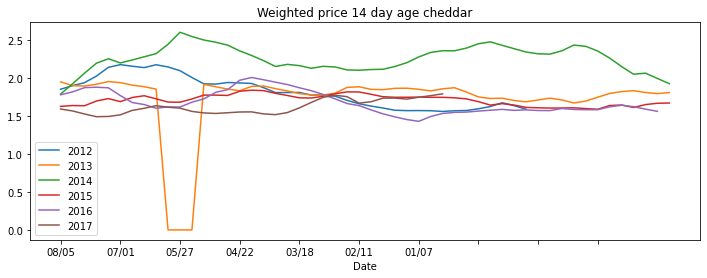

In [49]:
fig, ax = plt.subplots()
for name, group in df1_14.groupby('year'):
    group.plot('Date', y='Weighted Price', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Weighted price 14 day age cheddar')
plt.show()

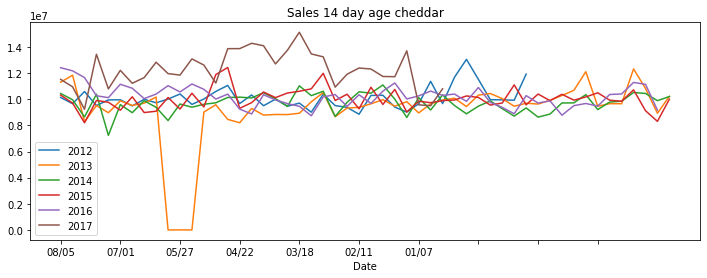

In [50]:
fig, ax = plt.subplots()
for name, group in df1_14.groupby('year'):
    group.plot('Date', y='Sales', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Sales 14 day age cheddar')
plt.show()

In [51]:
df1.set_index(keys=['age'], drop=False,inplace=True)
ages=df1['age'].unique().tolist()
df1_28 = df1.loc[df1.age==28]        
df1_28.head(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
age,,,,,,,,,,,
28,2017-08-19,08/23/2017,07/22,1.5238,1.4489,9233624,34.79,1999-07-22,2017,2017-07-22,28
28,2017-08-12,08/16/2017,07/15,1.4880,1.4164,13441457,34.87,1999-07-15,2017,2017-07-15,28
28,2017-08-05,08/09/2017,07/08,1.4911,1.4204,10796511,34.91,1999-07-08,2017,2017-07-08,28
28,2017-07-29,08/02/2017,07/01,1.5125,1.4381,12210435,34.79,1999-07-01,2017,2017-07-01,28
28,2017-07-22,07/26/2017,06/24,1.5710,1.4943,11220932,34.82,1999-06-24,2017,2017-06-24,28


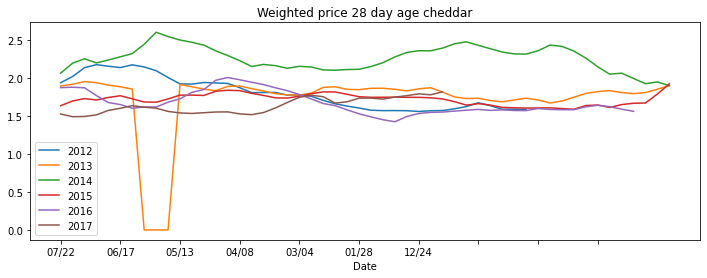

In [52]:
fig, ax = plt.subplots()
for name, group in df1_28.groupby('year'):
    group.plot('Date', y='Weighted Price', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Weighted price 28 day age cheddar')
plt.show()

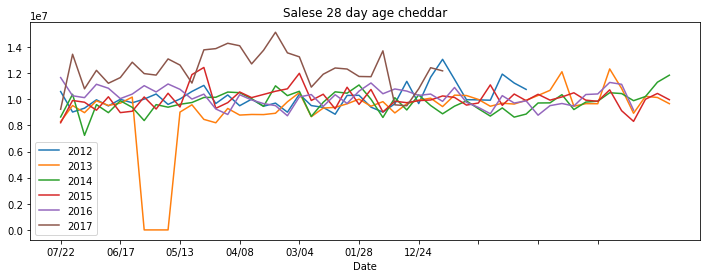

In [53]:
fig, ax = plt.subplots()
for name, group in df1_28.groupby('year'):
    group.plot('Date', y='Sales', ax=ax, label=name,figsize=(12,4))
    ax.set_title('Salese 28 day age cheddar')
plt.show()

In [54]:
df1_14.set_index(keys=['year'], drop=False,inplace=True)
years_14=df1_14['year'].unique().tolist()
df1_14_2013_2015 = df1_14.loc[(df1_14.year>=2013) & (df1_14.year<=2015)]
df1_14_2013_2015.head(5)
df1_14_2013_2015.tail(5)

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content,mo_day,year,Date_yr,age
year,,,,,,,,,,,
2013,2013-02-02,02/06/2013,01/19,1.8179,1.7274,9655014,34.75,1999-01-19,2013,2013-01-19,14
2013,2013-01-26,01/30/2013,01/12,1.8307,1.7385,12318502,34.71,1999-01-12,2013,2013-01-12,14
2013,2013-01-19,01/24/2013,01/05,1.8057,1.7130,10823056,34.64,1999-01-05,2013,2013-01-05,14
2013,2013-01-12,01/16/2013,12/29,1.7916,1.7043,8925942,34.82,1999-12-29,2013,2013-12-29,14
2013,2013-01-05,01/09/2013,12/22,1.8052,1.7146,10220350,34.72,1999-12-22,2013,2013-12-22,14
